训练并导出RNN模型

In [6]:
import pandas as pd
df = pd.read_excel("../datasets/flowspeeds.xlsx")

In [7]:
print(df)

       INDEX                TIME  154_FT_101.PV
0          1 2023-05-01 00:00:00        101.094
1          2 2023-05-01 00:01:00        101.979
2          3 2023-05-01 00:02:00        103.903
3          4 2023-05-01 00:03:00        103.292
4          5 2023-05-01 00:04:00        102.811
...      ...                 ...            ...
41755  41756 2023-05-29 23:55:00        115.459
41756  41757 2023-05-29 23:56:00        114.816
41757  41758 2023-05-29 23:57:00        115.668
41758  41759 2023-05-29 23:58:00        114.803
41759  41760 2023-05-29 23:59:00        117.052

[41760 rows x 3 columns]
       INDEX                TIME  154_FT_101.PV
0          1 2023-05-01 00:00:00        101.094
1          2 2023-05-01 00:01:00        101.979
2          3 2023-05-01 00:02:00        103.903
3          4 2023-05-01 00:03:00        103.292
4          5 2023-05-01 00:04:00        102.811
...      ...                 ...            ...
41755  41756 2023-05-29 23:55:00        115.459
41756  41757 2

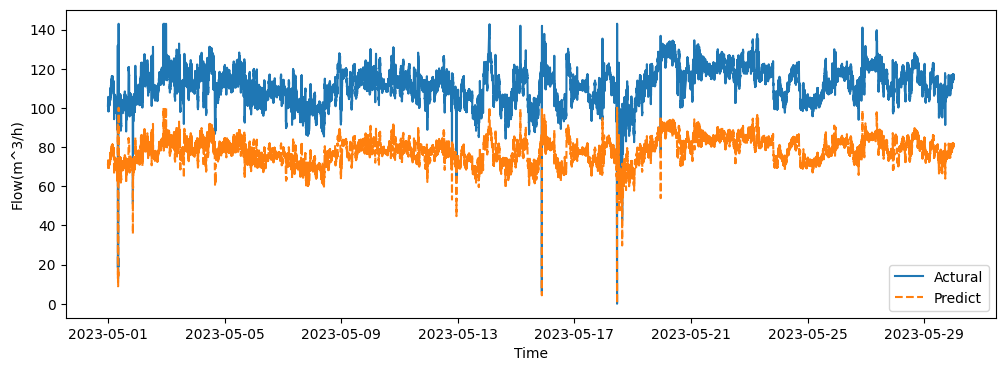

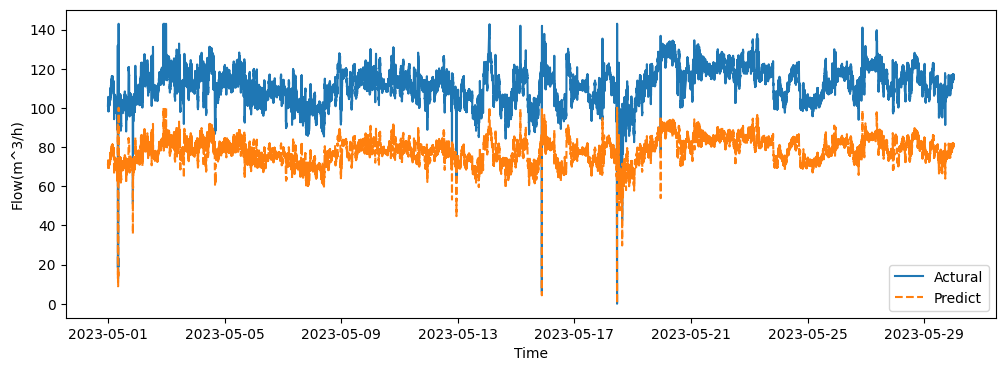

In [8]:
import matplotlib.pyplot as plt
import numpy as np

s = df["154_FT_101.PV"]
t = df["TIME"]
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_xlabel('Time')
ax.set_ylabel('Flow(m^3/h)')
ax.plot(t, s,label='Actural')
ax.plot(t, .7*s, linestyle='--',label='Predict')
plt.legend()
plt.show()

In [9]:
import torch
def choose_device():
    if not torch.backends.mps.is_available():
        return torch.device("cpu")
    else:
        return torch.device("mps")
device = choose_device()
print(device)

mps
mps


In [10]:
rnn = torch.nn.RNN(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
output, hn = rnn(input, h0)
print(output)


tensor([[[-0.5369, -0.1427, -0.6306, -0.6672,  0.5993, -0.3975, -0.3011,
           0.6409, -0.0755,  0.1822, -0.0466,  0.8962, -0.1966, -0.5132,
           0.1179, -0.1485,  0.0886,  0.0614, -0.3916, -0.5470],
         [ 0.4258, -0.0583, -0.2181, -0.0284,  0.0616, -0.1340, -0.0791,
           0.4362,  0.1499, -0.2134, -0.0796,  0.7854, -0.1525,  0.4461,
           0.6392, -0.4516, -0.0384,  0.3079, -0.6915, -0.4503],
         [ 0.4278, -0.0805, -0.4247, -0.6242, -0.2929,  0.1721,  0.6947,
           0.3152,  0.4141,  0.1677,  0.1164, -0.3860, -0.3385,  0.2310,
           0.2243, -0.2296, -0.5586, -0.4221,  0.4949,  0.2587]],

        [[ 0.5915,  0.5046, -0.2707, -0.3102,  0.4318,  0.0691,  0.0540,
           0.3018,  0.2098,  0.0478, -0.1589,  0.4384, -0.2562, -0.3440,
          -0.3054, -0.5901, -0.2727, -0.0445,  0.3810,  0.1812],
         [-0.6280,  0.0309,  0.1596,  0.5459,  0.0839, -0.0927,  0.1370,
           0.3085,  0.4066,  0.0848,  0.0447,  0.0458, -0.2105,  0.0957,
        